In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")

In [2]:
columns = ["target", "id", "date", "flag", "user", "text"]

file_path = "../data/raw/sentiment140.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1", names=columns)

print(f"✅Dataset shape: {df.shape}")
df.head()

✅Dataset shape: (1600000, 6)


,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   id      1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [4]:
df['sentiment'] = np.where(df['target'] == 0, 'Negative', 'Positive')

df['sentiment'].value_counts()

sentiment
Negative    800000
Positive    800000
Name: count, dtype: int64

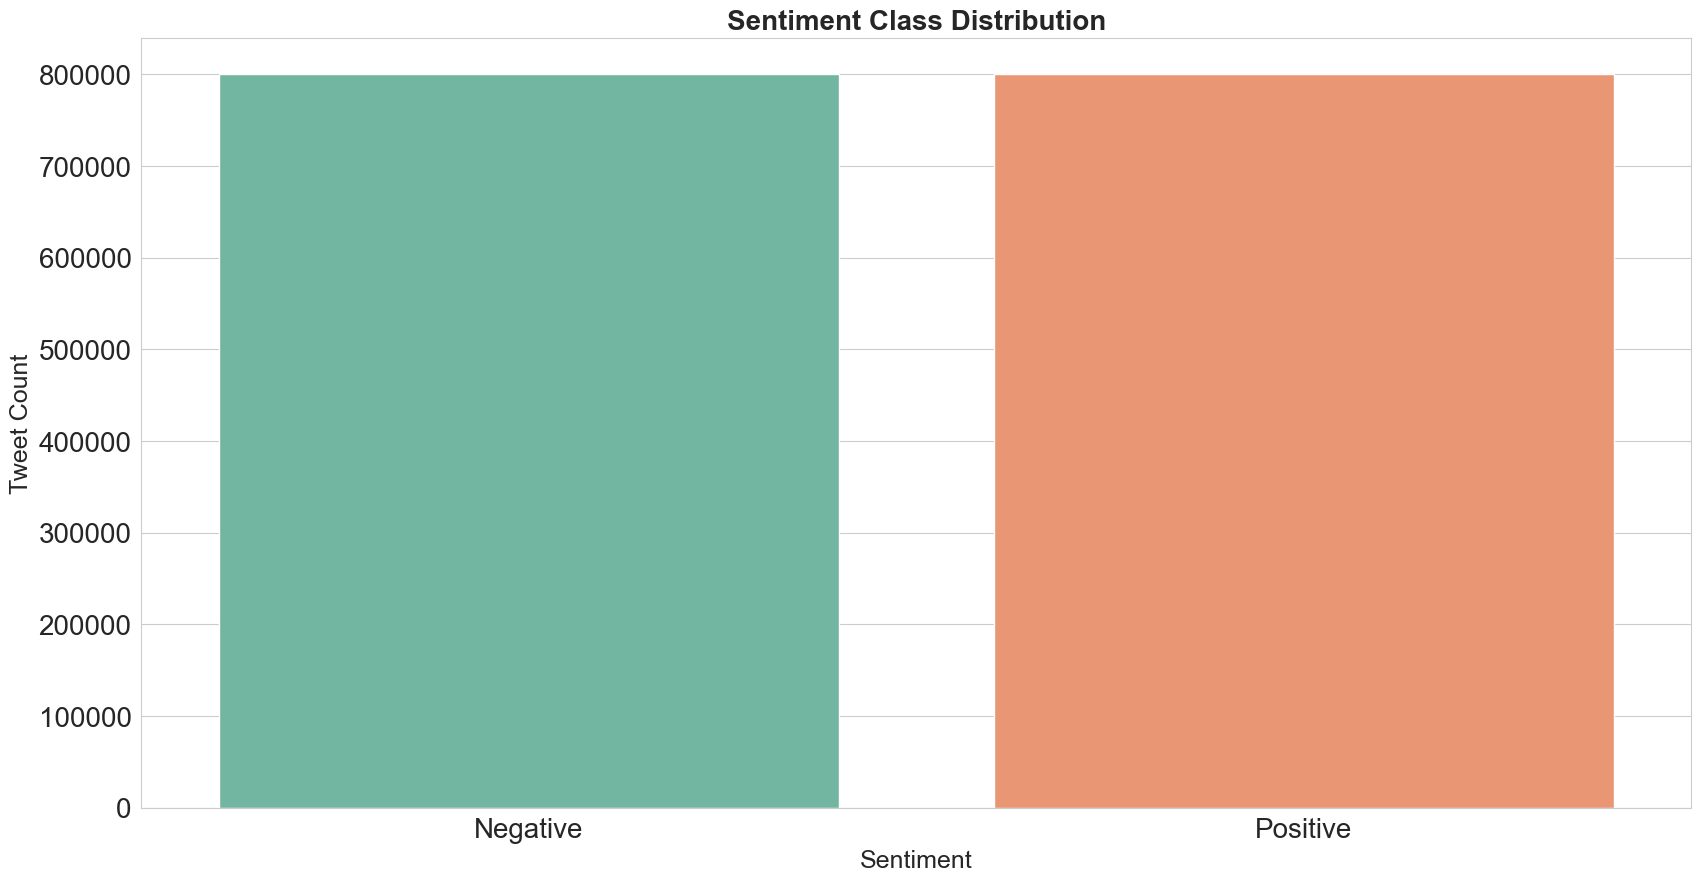

In [5]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title("Sentiment Class Distribution", fontsize=20, fontweight='bold',fontfamily='sans-serif')
plt.xlabel("Sentiment", fontsize=18, fontfamily='sans-serif')
plt.ylabel("Tweet Count", fontsize=18, fontfamily='sans-serif')

plt.xticks(fontsize=20, fontfamily='sans-serif')
plt.yticks(fontsize=20, fontfamily='sans-serif')

plt.show()


In [6]:
print("🔎 Missing values per column:")
print(df.isnull().sum())

print("\n📛 Duplicate records:", df.duplicated().sum())

🔎 Missing values per column:
target       0
id           0
date         0
flag         0
user         0
text         0
sentiment    0
dtype: int64

📛 Duplicate records: 0


In [7]:
for label in ['Negative', 'Positive']:
    print(f"\n🔹 Sample tweets for sentiment: {label}")
    display(df[df['sentiment'] == label][['text']].sample(5, random_state=42))


🔹 Sample tweets for sentiment: Negative


,text
212188,@xnausikaax oh no! where did u order from? that's horrible
299036,A great hard training weekend is over. a couple days of rest and lets do it again! Lots of computer time to put in now
475978,"Right, off to work Only 5 hours to go until I'm free xD"
588988,I am craving for japanese food
138859,Jean Michel Jarre concert tomorrow gotta work 7-3 before though



🔹 Sample tweets for sentiment: Positive


,text
1012188,Is lookin 4ward to a long weekend really dont want to go to work 2day tho =[ x
1099036,#myweakness Is music and i live to meet the people who make it
1275978,figured out the Internet on my new iPod
1388988,@hillsongunited can't wait to worship with you guys tonight. it'll be so much fun
938859,@sillybeggar Congrats James !! I'm sure the book is going to be a huge success


In [8]:
tweet_lengths = df['text'].apply(len)

avg_len = np.mean(tweet_lengths)
med_len = np.median(tweet_lengths)
std_len = np.std(tweet_lengths)

print(f"📝 Avg Length: {avg_len:.2f}")
print(f"📝 Median Length: {med_len}")
print(f"📝 Std Deviation: {std_len:.2f}")

📝 Avg Length: 74.10
📝 Median Length: 69.0
📝 Std Deviation: 36.46


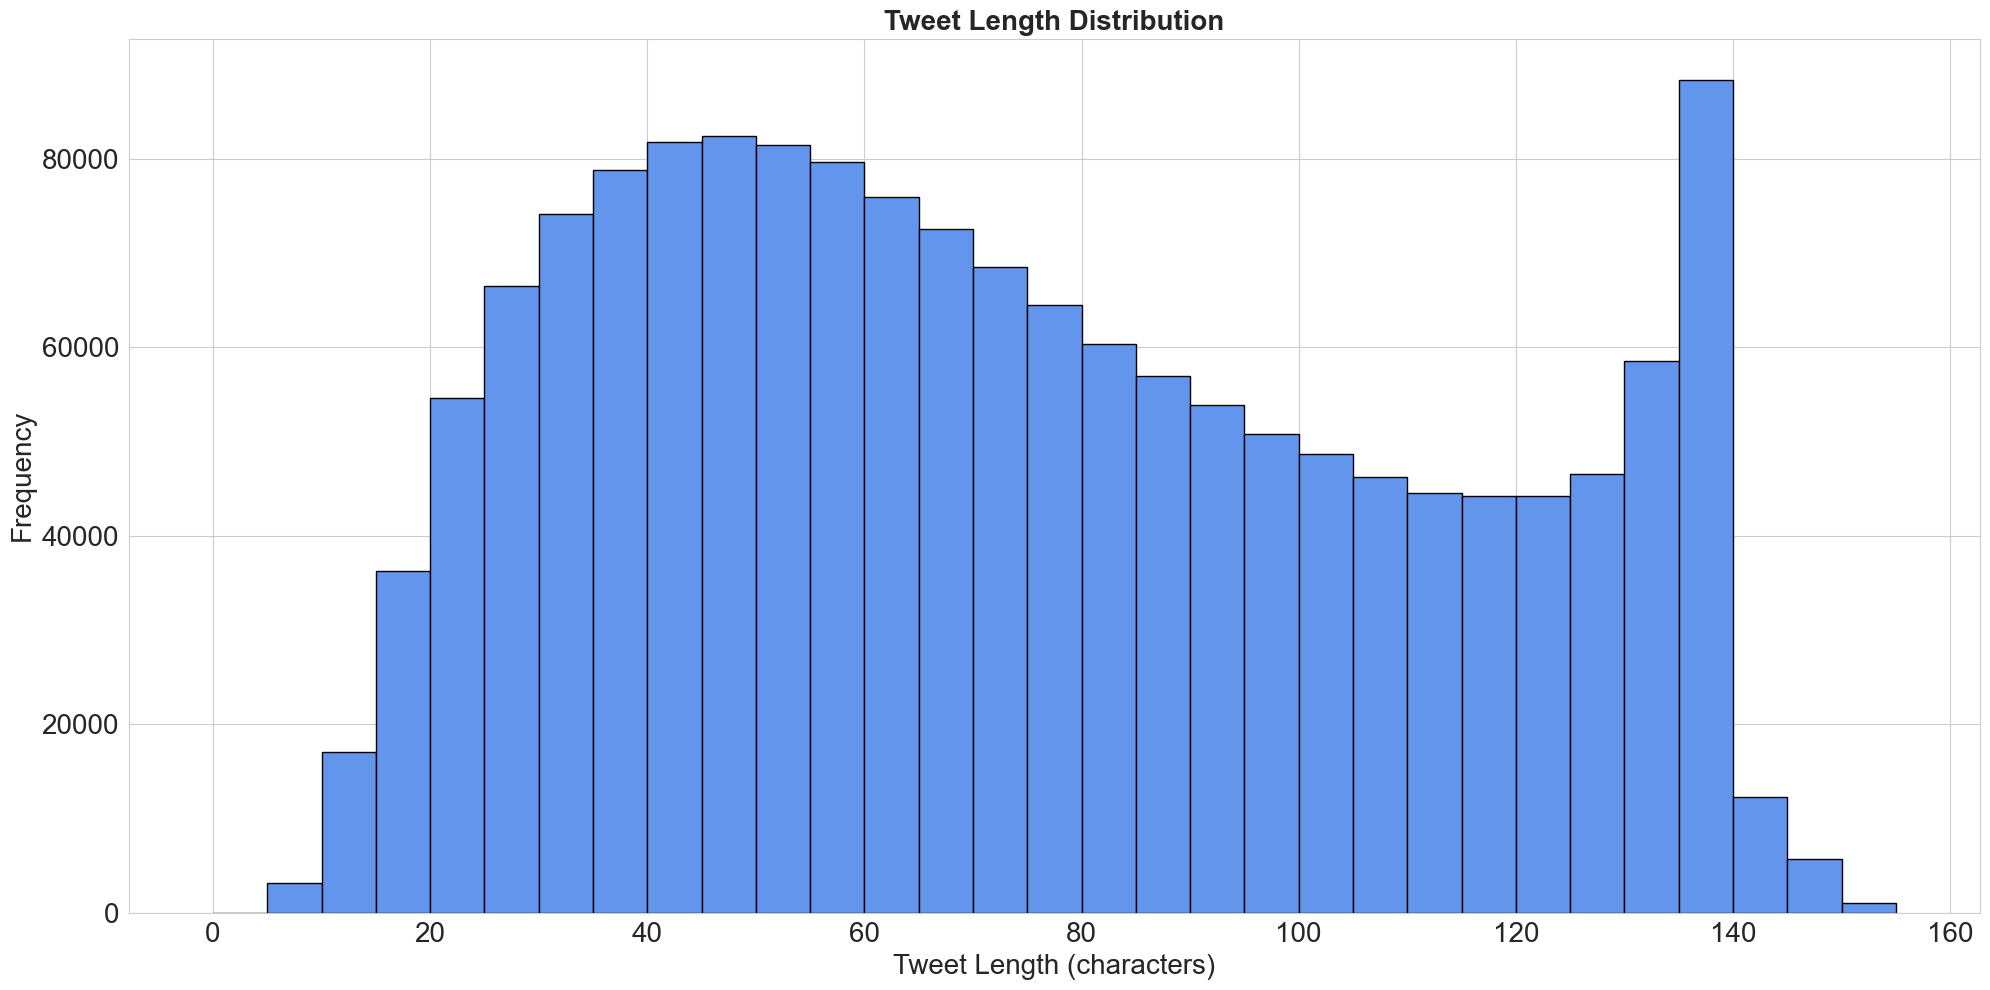

In [9]:
plt.figure(figsize=(20, 10))
plt.hist(tweet_lengths, bins=np.arange(0, 160, 5), color='cornflowerblue', edgecolor='black')
plt.title("Tweet Length Distribution", fontsize=20, fontweight='bold', fontfamily='sans-serif')
plt.xlabel("Tweet Length (characters)", fontsize=20, fontfamily='sans-serif')
plt.ylabel("Frequency", fontsize=20, fontfamily='sans-serif')

plt.xticks(fontsize=20, fontfamily='sans-serif')
plt.yticks(fontsize=20, fontfamily='sans-serif')

plt.grid(True)
plt.tight_layout()
plt.show()